# Session Notebook

This notebook summarises the concepts that are discussed during the live FC Python x Training Ground Guru session. There are 3 broad topics:

1. Preparation - JSON data import, cleaning and organisation
2. Analysis - Extracting some information from the data
3. Visualisation

To run the code yourself, you will need to install Python and download the data - we will of course run through all of this during the session. Python installation instructions can be found in the welcome email.

In [ ]:
#Import modules
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [ ]:
# Opening JSON file and saving it to a variable called data
# Make sure that your data file is in the same folder as your script
with open('match.json') as file:
    data = json.load(file)

In [ ]:
# Show the file - it is very big, so won't all show here
data

In [ ]:
# data variable is a datatype called a dictionary
# A dictionary has keys & values
# Think of keys as the labels and values as the data
# Check the keys
data.keys()

dict_keys(['meta', 'events'])

In [ ]:
# Inside the events data, show me the first event 
data['events'][0]

{'id': 1074868841,
 'matchId': 5234875,
 'matchPeriod': '1H',
 'minute': 0,
 'second': 14,
 'matchTimestamp': '00:00:14.897',
 'videoTimestamp': '20.897823',
 'relatedEventId': 1074868842,
 'type': {'primary': 'pass',
  'secondary': ['back_pass', 'short_or_medium_pass']},
 'location': {'x': 49, 'y': 50},
 'team': {'id': 1612, 'name': 'Liverpool', 'formation': '4-3-3'},
 'opponentTeam': {'id': 1625, 'name': 'Manchester City', 'formation': '4-3-3'},
 'player': {'id': 7964, 'name': 'J. Henderson', 'position': 'RCMF3'},
 'pass': {'accurate': True,
  'angle': 149,
  'height': None,
  'length': 29,
  'recipient': {'id': 14870, 'name': 'J. Matip', 'position': 'RCB'},
  'endLocation': {'x': 25, 'y': 72}},
 'shot': None,
 'groundDuel': None,
 'aerialDuel': None,
 'infraction': None,
 'carry': None,
 'possession': {'id': 1074868841,
  'duration': '21.876562',
  'types': [],
  'eventsNumber': 10,
  'eventIndex': 0,
  'startLocation': {'x': 49, 'y': 50},
  'endLocation': {'x': 75, 'y': 23},
  'tea

In [ ]:
# What are the keys (lables) for the information in the event?
data['events'][0].keys()

dict_keys(['id', 'matchId', 'matchPeriod', 'minute', 'second', 'matchTimestamp', 'videoTimestamp', 'relatedEventId', 'type', 'location', 'team', 'opponentTeam', 'player', 'pass', 'shot', 'groundDuel', 'aerialDuel', 'infraction', 'carry', 'possession'])

In [ ]:
# Option 1 for processing data

# Create empty lists to store our information
events = []
players = []
minutes = []
seconds = []

# For each event, append the correct information
for each in data['events']:
    events.append(each['type']['primary'])
    players.append(each['player']['name'])
    minutes.append(each['minute'])
    seconds.append(each['second'])

# Create a dataframe out of the lists
tempDF = pd.DataFrame({'Player':players,'Event':events, 'Minutes':minutes,'Seconds':seconds})
tempDF.head()

,Player,Event,Minutes,Seconds
0,J. Henderson,pass,0,14
1,J. Matip,pass,0,16
2,Diogo Jota,duel,0,20
3,Rodri,duel,0,20
4,V. van Dijk,pass,0,22


In [ ]:
# Option 2 for processing data - preffered!
df = pd.DataFrame.from_dict(data['events'])

# Show first 5 rows only
df.head()

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type,location,team,opponentTeam,player,pass,shot,groundDuel,aerialDuel,infraction,carry,possession
0,1074868841,5234875,1H,0,14,00:00:14.897,20.897823,1.074869e+09,"{'primary': 'pass', 'secondary': ['back_pass',...","{'x': 49, 'y': 50}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 7964, 'name': 'J. Henderson', 'position...","{'accurate': True, 'angle': 149, 'height': Non...",None,None,None,None,None,"{'id': 1074868841, 'duration': '21.876562', 't..."
1,1074868842,5234875,1H,0,16,00:00:16.612,22.612328,1.074869e+09,"{'primary': 'pass', 'secondary': ['forward_pas...","{'x': 25, 'y': 72}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 14870, 'name': 'J. Matip', 'position': ...","{'accurate': True, 'angle': -30, 'height': 'hi...",None,None,None,None,None,"{'id': 1074868841, 'duration': '21.876562', 't..."
2,1074868845,5234875,1H,0,20,00:00:20.022,26.022772,1.074869e+09,"{'primary': 'duel', 'secondary': ['aerial_duel...","{'x': 69, 'y': 32}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 345621, 'name': 'Diogo Jota', 'position...",None,None,None,"{'opponent': {'id': 364860, 'name': 'Rodri', '...",None,None,"{'id': 1074868841, 'duration': '21.876562', 't..."
3,1074868871,5234875,1H,0,20,00:00:20.022,26.022772,1.074869e+09,"{'primary': 'duel', 'secondary': ['aerial_duel...","{'x': 31, 'y': 68}","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 364860, 'name': 'Rodri', 'position': 'D...",None,None,None,"{'opponent': {'id': 345621, 'name': 'Diogo Jot...",None,None,"{'id': 1074868841, 'duration': '21.876562', 't..."
4,1074868846,5234875,1H,0,22,00:00:22.097,28.097454,1.074869e+09,"{'primary': 'pass', 'secondary': ['forward_pas...","{'x': 42, 'y': 29}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 370, 'name': 'V. van Dijk', 'position':...","{'accurate': True, 'angle': 7, 'height': 'high...",None,None,None,None,None,"{'id': 1074868841, 'duration': '21.876562', 't..."


In [ ]:
# There are some nested dictionaries in our table cells
# This isn't ideal, we should process them into new columns

# Convert the dictionary into a series (column)
typeDetail = df['type'].apply(pd.Series)

# Stitch these new series (columns) onto the side of our main dataframe
df = pd.concat([df, typeDetail], axis = 1)

# Repeat with player
playerDetail = df['player'].apply(pd.Series)
playerDetail.drop(['id'],1,inplace=True)
playerDetail.columns = ['Player', 'Position']
df = pd.concat([df,playerDetail], axis=1)

# Check the top row
df.head(1)

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type,location,team,opponentTeam,player,pass,shot,groundDuel,aerialDuel,infraction,carry,possession,primary,secondary,Player,Position
0,1074868841,5234875,1H,0,14,00:00:14.897,20.897823,1.074869e+09,"{'primary': 'pass', 'secondary': ['back_pass',...","{'x': 49, 'y': 50}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 7964, 'name': 'J. Henderson', 'position...","{'accurate': True, 'angle': 149, 'height': Non...",None,None,None,None,None,"{'id': 1074868841, 'duration': '21.876562', 't...",pass,"[back_pass, short_or_medium_pass]",J. Henderson,RCMF3


In [ ]:
# View the event types
df['primary'].unique()

array(['pass', 'duel', 'touch', 'interception', 'game_interruption',
       'throw_in', 'infraction', 'free_kick', 'clearance', 'acceleration',
       'offside', 'goal_kick', 'corner', 'shot', 'goalkeeper_exit',
       'shot_against'], dtype=object)

In [ ]:
# Create a passes-only dataframe

# New dataframe with copy so that changes do not affect original data
passesDF = df.copy()

# Filter to get passes only
passesDF = passesDF[passesDF['primary'] == 'pass']

# Create new columns as before
passDetail = passesDF['pass'].apply(pd.Series)
passesDF = pd.concat([passesDF, passDetail], axis = 1)

locationDetail = passesDF['location'].apply(pd.Series)
locationDetail.columns = ['Origin X', 'Origin Y']
passesDF = pd.concat([passesDF,locationDetail], axis=1)

endLocationDetail = passesDF['endLocation'].apply(pd.Series)
endLocationDetail.columns = ['End X', 'End Y']
passesDF = pd.concat([passesDF,endLocationDetail], axis=1)

teamDetail = passesDF['team'].apply(pd.Series)
teamDetail.drop(['id'],1,inplace=True)
teamDetail.columns = ['Team', 'Formation']
passesDF = pd.concat([passesDF,teamDetail], axis=1)

oppTeamDetail = passesDF['opponentTeam'].apply(pd.Series)
oppTeamDetail.drop(['id'],1,inplace=True)
oppTeamDetail.columns = ['Opposition', 'Opposition Formation']
passesDF = pd.concat([passesDF,oppTeamDetail], axis=1)

# Add receiving player
recipientDetail = passesDF['recipient'].apply(pd.Series)
recipientDetail.drop(['id'],1,inplace=True)
recipientDetail.columns = ['Rec Player', 'Rec Player Position']
passesDF = pd.concat([passesDF,recipientDetail], axis=1)

# Show new dataframe
passesDF.head(1)

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type,location,team,opponentTeam,player,pass,shot,groundDuel,aerialDuel,infraction,carry,possession,primary,secondary,Player,Position,accurate,angle,height,length,recipient,endLocation,Origin X,Origin Y,End X,End Y,Team,Formation,Opposition,Opposition Formation,Rec Player,Rec Player Position
0,1074868841,5234875,1H,0,14,00:00:14.897,20.897823,1.074869e+09,"{'primary': 'pass', 'secondary': ['back_pass',...","{'x': 49, 'y': 50}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 7964, 'name': 'J. Henderson', 'position...","{'accurate': True, 'angle': 149, 'height': Non...",None,None,None,None,None,"{'id': 1074868841, 'duration': '21.876562', 't...",pass,"[back_pass, short_or_medium_pass]",J. Henderson,RCMF3,True,149,None,29,"{'id': 14870, 'name': 'J. Matip', 'position': ...","{'x': 25, 'y': 72}",49,50,25,72,Liverpool,4-3-3,Manchester City,4-3-3,J. Matip,RCB


In [ ]:
# Secondaries looks interesting, what types are there?

secondaries = []

for group in passesDF['secondary']:
    for each in group:
        secondaries.append(each)

set(secondaries)


{'assist',
 'back_pass',
 'carry',
 'counterpressing_recovery',
 'cross',
 'cross_blocked',
 'deep_completed_cross',
 'deep_completion',
 'forward_pass',
 'hand_pass',
 'head_pass',
 'key_pass',
 'lateral_pass',
 'linkup_play',
 'long_pass',
 'loss',
 'pass_to_final_third',
 'pass_to_penalty_area',
 'progressive_pass',
 'recovery',
 'short_or_medium_pass',
 'shot_assist',
 'smart_pass',
 'through_pass',
 'touch_in_box',
 'under_pressure'}

In [ ]:
# Create df of just penalty area entries

penEntriesDF = passesDF[passesDF['secondary'].apply(lambda x: 'pass_to_penalty_area' in x)]
penEntriesDF.head(1)

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type,location,team,opponentTeam,player,pass,shot,groundDuel,aerialDuel,infraction,carry,possession,primary,secondary,Player,Position,accurate,angle,height,length,recipient,endLocation,Origin X,Origin Y,End X,End Y,Team,Formation,Opposition,Opposition Formation,Rec Player,Rec Player Position
53,1074868886,5234875,1H,1,57,00:01:57.109,123.109515,1.074869e+09,"{'primary': 'pass', 'secondary': ['cross', 'la...","{'x': 91, 'y': 91}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 7964, 'name': 'J. Henderson', 'position...","{'accurate': False, 'angle': -90, 'height': 'l...",None,None,None,None,None,"{'id': 1074868877, 'duration': '8.6407615', 't...",pass,"[cross, lateral_pass, loss, pass_to_penalty_area]",J. Henderson,RCMF3,False,-90,low,18,"{'id': 134502, 'name': 'A. Laporte', 'position...","{'x': 91, 'y': 64}",91,91,91,64,Liverpool,4-3-3,Manchester City,4-3-3,A. Laporte,LCB


In [ ]:
# With original pass dataframe, I want to see who made most passes

# Create a pivot based on player and accurate columns
passSummary = passesDF.groupby(['Player','accurate'])
# Summarise the pivot by counting how many accurate/inaccurate passes each player had
passSummary = passSummary.count()['id'].reset_index().pivot('Player','accurate')

# Blanks appear as n/a, fill them with 0
passSummary = passSummary.fillna(0)

# Tidy columns
passSummary.columns = passSummary.columns.droplevel()
passSummary.columns = ['False', 'True']

# Calculate total passes and pass accuracy
passSummary['Total'] = passSummary['False'] + passSummary['True']
passSummary['Acc'] = (passSummary['True']/passSummary['Total']*100).round(1)

#Reset Index
passSummary.reset_index(level=0, inplace=True)

# Show table, sorted by most passes
passSummary.sort_values('Total', ascending=False)

,Player,False,True,Total,Acc
24,V. van Dijk,6.0,72.0,78.0,92.3
12,J. Matip,6.0,66.0,72.0,91.7
16,K. Walker,11.0,52.0,63.0,82.5
14,João Cancelo,11.0,47.0,58.0,81.0
0,A. Laporte,3.0,51.0,54.0,94.4
22,Rúben Dias,4.0,49.0,53.0,92.5
3,Bernardo Silva,5.0,45.0,50.0,90.0
21,Rodri,3.0,45.0,48.0,93.8
4,C. Jones,2.0,40.0,42.0,95.2
15,K. De Bruyne,12.0,30.0,42.0,71.4


In [ ]:
# Instead of grouping by accuracy, group by receiving player to see key relations
passRelations = passesDF.groupby(['Player','Rec Player']).count()['id'] 
passRelations#['J. Henderson']

Player       Rec Player    
A. Laporte   Bernardo Silva    7
             Ederson           4
             Fabinho           1
             Gabriel Jesus     2
             J. Grealish       4
                              ..
V. van Dijk  João Cancelo      1
             K. Walker         2
             Mohamed Salah     1
             Rodri             1
             S. Mané           3
Name: id, Length: 292, dtype: int64

In [ ]:
# Pivot this data to show players on rows and columns
passRelations = passRelations.reset_index().pivot('Player', 'Rec Player')
passRelations = passRelations.fillna(0)
passRelations

id                                               \
Rec Player      A. Laporte A. Robertson Alisson Bernardo Silva C. Jones   
Player                                                                    
A. Laporte             0.0          0.0     0.0            7.0      0.0   
A. Robertson           1.0          0.0     3.0            0.0      4.0   
Alisson                0.0          5.0     0.0            1.0      1.0   
Bernardo Silva         2.0          0.0     0.0            0.0      0.0   
C. Jones               0.0         10.0     0.0            0.0      0.0   
Diogo Jota             0.0          2.0     0.0            0.0      0.0   
Ederson                5.0          0.0     1.0            2.0      0.0   
Fabinho                1.0          2.0     1.0            0.0      3.0   
Gabriel Jesus          0.0          0.0     0.0            1.0      1.0   
J. Gomez               0.0          1.0     1.0            1.0      0.0   
J. Grealish            1.0          0.0     0.0            4.0      0.0   
J. Henderson           4.0          1.0     1.0            0.0      1.0   
J. Matip               1.0          0.0    15.0            1.0      2.0   
J. Milner              2.0          0.0     5.0            1.0      1.0   
João Cancelo           5.0          0.0     1.0           11.0      0.0   
K. De Bruyne           3.0          1.0     0.0            2.0      0.0   
K. Walker              4.0          2.0     0.0            4.0      1.0   
Mohamed Salah          1.0          0.0     0.0            2.0      0.0   
P. Foden               0.0          1.0     1.0            6.0      0.0   
R. Sterling            0.0          0.0     0.0            0.0      0.0   
Roberto Firmino        0.0          0.0     0.0            0.0      2.0   
Rodri                  4.0          1.0     0.0            1.0      0.0   
Rúben Dias            20.0          0.0     1.0            0.0      0.0   
S. Mané                0.0          1.0     0.0            1.0      5.0   
V. van Dijk            0.0          9.0     8.0            0.0     12.0   

                                                                               \
Rec Player      Diogo Jota Ederson Fabinho Gabriel Jesus J. Gomez J. Grealish   
Player                                                                          
A. Laporte             0.0     4.0     1.0           2.0      0.0         4.0   
A. Robertson           2.0     0.0     3.0           2.0      1.0         0.0   
Alisson                1.0     0.0     1.0           0.0      0.0         0.0   
Bernardo Silva         0.0     0.0     0.0           5.0      0.0         3.0   
C. Jones               1.0     1.0     5.0           0.0      1.0         0.0   
Diogo Jota             0.0     2.0     0.0           1.0      0.0         0.0   
Ederson                0.0     0.0     0.0           0.0      0.0         0.0   
Fabinho                0.0     1.0     0.0           0.0      0.0         0.0   
Gabriel Jesus          1.0     0.0     1.0           0.0      1.0         1.0   
J. Gomez               0.0     0.0     1.0           0.0      0.0         0.0   
J. Grealish            0.0     0.0     0.0           2.0      0.0         0.0   
J. Henderson           1.0     0.0     2.0           0.0      1.0         0.0   
J. Matip               3.0     0.0     4.0           0.0      3.0         0.0   
J. Milner              1.0     1.0     4.0           0.0      0.0         0.0   
João Cancelo           1.0     1.0     0.0           3.0      0.0         4.0   
K. De Bruyne           0.0     1.0     1.0           5.0      0.0         0.0   
K. Walker              0.0     4.0     1.0           9.0      1.0         0.0   
Mohamed Salah          1.0     0.0     0.0           0.0      1.0         0.0   
P. Foden               0.0     0.0     0.0           2.0      0.0         4.0   
R. Sterling            0.0     0.0     0.0           1.0      1.0         0.0   
Roberto Firmino        0.0     0.0     1.0           0.0    

In [ ]:
# Create a shots dataframe
# Create a passes-only dataframe

# New dataframe with copy so that changes do not affect original data
shotsDF = df.copy()

# Filter to get passes only
shotsDF = shotsDF[shotsDF['primary'] == 'shot']

# Create new columns as before
shotDetail = shotsDF['shot'].apply(pd.Series)
shotsDF = pd.concat([shotsDF, shotDetail], axis = 1)

locationDetail = shotsDF['location'].apply(pd.Series)
locationDetail.columns = ['Origin X', 'Origin Y']
shotsDF = pd.concat([shotsDF,locationDetail], axis=1)

teamDetail = shotsDF['team'].apply(pd.Series)
teamDetail.drop(['id'],1,inplace=True)
teamDetail.columns = ['Team', 'Formation']
shotsDF = pd.concat([shotsDF,teamDetail], axis=1)

oppTeamDetail = shotsDF['opponentTeam'].apply(pd.Series)
oppTeamDetail.drop(['id'],1,inplace=True)
oppTeamDetail.columns = ['Opposition', 'Opposition Formation']
shotsDF = pd.concat([shotsDF,oppTeamDetail], axis=1)

shotsDF.head()

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,type,location,team,opponentTeam,player,pass,shot,groundDuel,aerialDuel,infraction,carry,possession,primary,secondary,Player,Position,bodyPart,isGoal,onTarget,goalZone,xg,postShotXg,goalkeeperActionId,goalkeeper,Origin X,Origin Y,Team,Formation,Opposition,Opposition Formation
173,1074869036,5234875,1H,7,14,00:07:14.382,440.382856,NaN,"{'primary': 'shot', 'secondary': ['shot_after_...","{'x': 87, 'y': 32}","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 120353, 'name': 'Mohamed Salah', 'posit...",None,"{'bodyPart': 'left_foot', 'isGoal': False, 'on...",None,None,None,None,"{'id': 1074869028, 'duration': '2.819421', 'ty...",shot,"[shot_after_corner, touch_in_box]",Mohamed Salah,RWF,left_foot,False,False,bc,0.01198,NaN,NaN,None,87,32,Liverpool,4-3-3,Manchester City,4-3-3
348,1074869450,5234875,1H,14,39,00:14:39.525,885.525798,NaN,"{'primary': 'shot', 'secondary': ['opportunity...","{'x': 90, 'y': 30}","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 11051, 'name': 'J. Grealish', 'position...",None,"{'bodyPart': 'right_foot', 'isGoal': False, 'o...",None,None,None,None,"{'id': 1074869418, 'duration': '56.6840225', '...",shot,"[opportunity, touch_in_box]",J. Grealish,CF,right_foot,False,False,bc,0.05322,NaN,NaN,None,90,30,Manchester City,4-3-3,Liverpool,4-3-3
477,1074869693,5234875,1H,20,14,00:20:14.579,1220.579046,NaN,"{'primary': 'shot', 'secondary': ['opportunity...","{'x': 94, 'y': 37}","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 447205, 'name': 'P. Foden', 'position':...",None,"{'bodyPart': 'left_foot', 'isGoal': False, 'on...",None,None,None,None,"{'id': 1074869677, 'duration': '8.471544', 'ty...",shot,"[opportunity, touch_in_box]",P. Foden,LWF,left_foot,False,True,glb,0.18540,0.4031,1.074869e+09,"{'id': 214220, 'name': 'Alisson'}",94,37,Manchester City,4-3-3,Liverpool,4-3-3
542,1074869799,5234875,1H,23,39,00:23:39.028,1425.028313,NaN,"{'primary': 'shot', 'secondary': ['opportunity...","{'x': 92, 'y': 33}","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 38021, 'name': 'K. De Bruyne', 'positio...",None,"{'bodyPart': 'left_foot', 'isGoal': False, 'on...",None,None,None,None,"{'id': 1074869781, 'duration': '13.6972145', '...",shot,"[opportunity, touch_in_box]",K. De Bruyne,RCMF3,left_foot,False,False,obr,0.07633,NaN,NaN,None,92,33,Manchester City,4-3-3,Liverpool,4-3-3
701,1074871275,5234875,1H,31,49,00:31:49.617,1915.617886,NaN,"{'primary': 'shot', 'secondary': ['opportunity...","{'x': 98, 'y': 34}","{'id': 1625, 'name': 'Manchester City', 'forma...","{'id': 1612, 'name': 'Liverpool', 'formation':...","{'id': 11051, 'name': 'J. Grealish', 'position...",None,"{'bodyPart': 'right_foot', 'isGoal': False, 'o...",None,None,None,None,"{'id': 1074869953, 'duration': '8.636595', 'ty...",shot,"[opportunity, touch_in_box]",J. Grealish,CF,right_foot,False,False,ptr,0.08707,NaN,NaN,None,98,34,Manchester City,4-3-3,Liverpool,4-3-3


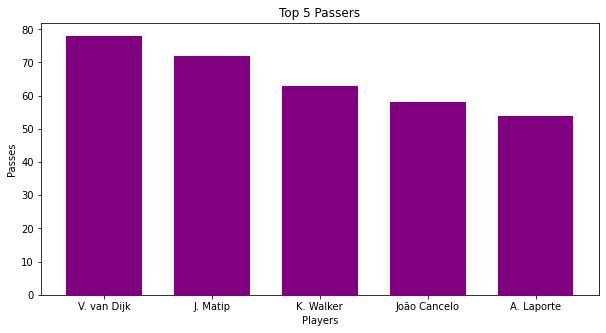

In [ ]:
# Basic bar chart of data we created earlier

# Create new dataframe of top 5 passers
top5df = passSummary.sort_values('Total', ascending=False)[0:5]

fig = plt.figure(figsize = (10, 5))

plt.bar(top5df['Player'][0:5], top5df['Total'][0:5], color ='purple',
        width = 0.7)
 
plt.xlabel("Players")
plt.ylabel("Passes")
plt.title("Top 5 Passers")
plt.show()

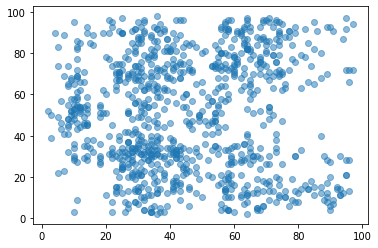

In [ ]:
#Show all passes
plt.plot(passesDF['Origin X'], passesDF['Origin Y'], 'o', alpha=.5)

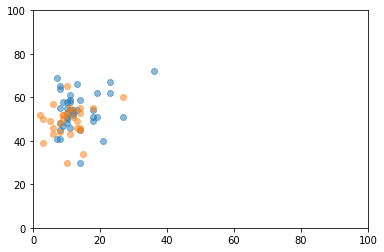

In [ ]:
# Check everything in one direction by plotting GKs
APasses = passesDF[passesDF['Player'] == 'Alisson']
EPasses = passesDF[passesDF['Player'] == 'Ederson']

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(APasses['Origin X'], APasses['Origin Y'], 'o', alpha=.5)
ax1.plot(EPasses['Origin X'], EPasses['Origin Y'], 'o', alpha=.5)
ax1.set_ylim([0,100])
ax1.set_xlim([0,100])
plt.show()

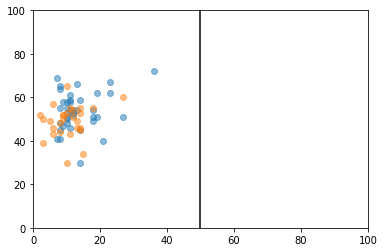

In [ ]:
#How to plot lines
#Check everything in one direction by plotting GKs
APasses = passesDF[passesDF['Player'] == 'Alisson']
EPasses = passesDF[passesDF['Player'] == 'Ederson']

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(APasses['Origin X'], APasses['Origin Y'], 'o', alpha=.5)
ax1.plot(EPasses['Origin X'], EPasses['Origin Y'], 'o', alpha=.5)
ax1.set_ylim([0,100])
ax1.set_xlim([0,100])

ax1.plot([50,50],[0,100], c = 'black')

plt.show()

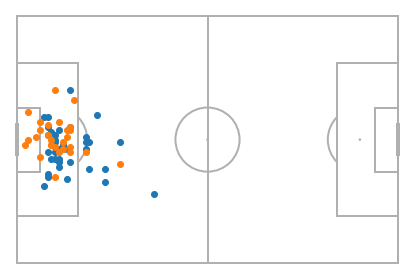

In [ ]:
#Shoulders of giants! Incredible library helps us to draw pitches and plot data
from mplsoccer import Pitch, VerticalPitch

pitch = Pitch(pitch_type='wyscout')
fig, ax = pitch.draw()

pitch.scatter(APasses['Origin X'], APasses['Origin Y'], ax=ax)
pitch.scatter(EPasses['Origin X'], EPasses['Origin Y'], ax=ax)

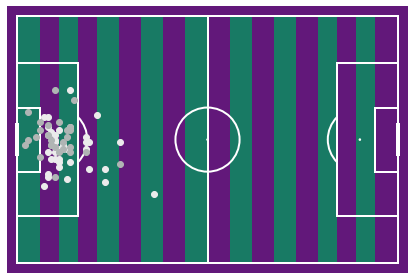

In [ ]:
# Customise pitch details
pitch = Pitch(pitch_type='wyscout', pitch_color='#62187a', line_color='white',
              stripe_color='#187a64', stripe=True)
fig, ax = pitch.draw()

pitch.scatter(APasses['Origin X'], APasses['Origin Y'], ax=ax, c='#ebebeb')
pitch.scatter(EPasses['Origin X'], EPasses['Origin Y'], ax=ax, c='#b0b5b4')

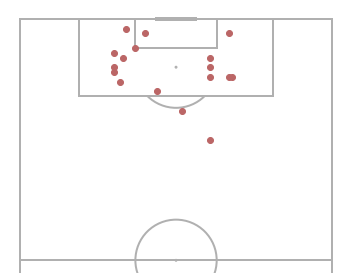

In [ ]:
pitch = VerticalPitch(pitch_type='wyscout', half=True)
fig, ax = pitch.draw()

pitch.scatter(shotsDF['Origin X'], shotsDF['Origin Y'], ax=ax, c='#bb6666')

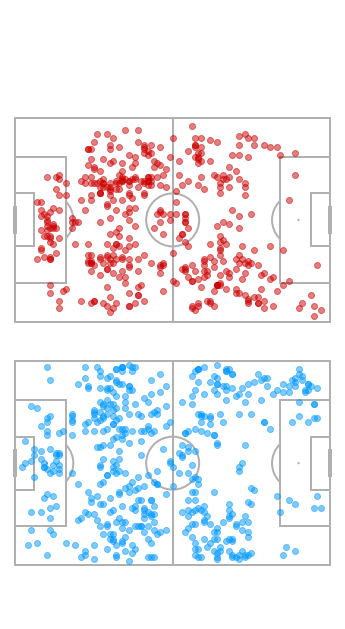

In [ ]:
LivPasses = passesDF[passesDF['Team'] == 'Liverpool']
CityPasses = passesDF[passesDF['Team'] == 'Manchester City']

pitch = Pitch(pitch_type='wyscout')

fig, axs = pitch.grid(ncols=1, nrows=2)

pitch.scatter(LivPasses['Origin X'], LivPasses['Origin Y'], ax=axs['pitch'][0], c="#cc0000", alpha=.5)
pitch.scatter(CityPasses['Origin X'], CityPasses['Origin Y'], ax=axs['pitch'][1], c="#0099ff", alpha=.5)

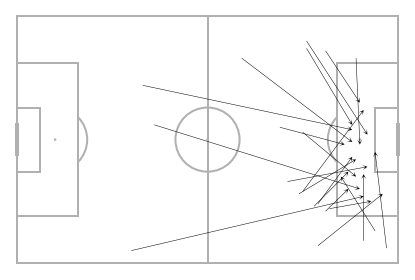

In [ ]:
pitch = Pitch(pitch_type='wyscout')
fig, ax = pitch.draw()

cityEntries = penEntriesDF[penEntriesDF['Team']=='Liverpool']

pitch.arrows(cityEntries['Origin X'], cityEntries['Origin Y'], cityEntries['End X'], cityEntries['End Y'], 
width=.5, headwidth=10, headlength=10, ax=ax)

Text(0.5, 0.5, 'LIV 15 min pass maps')

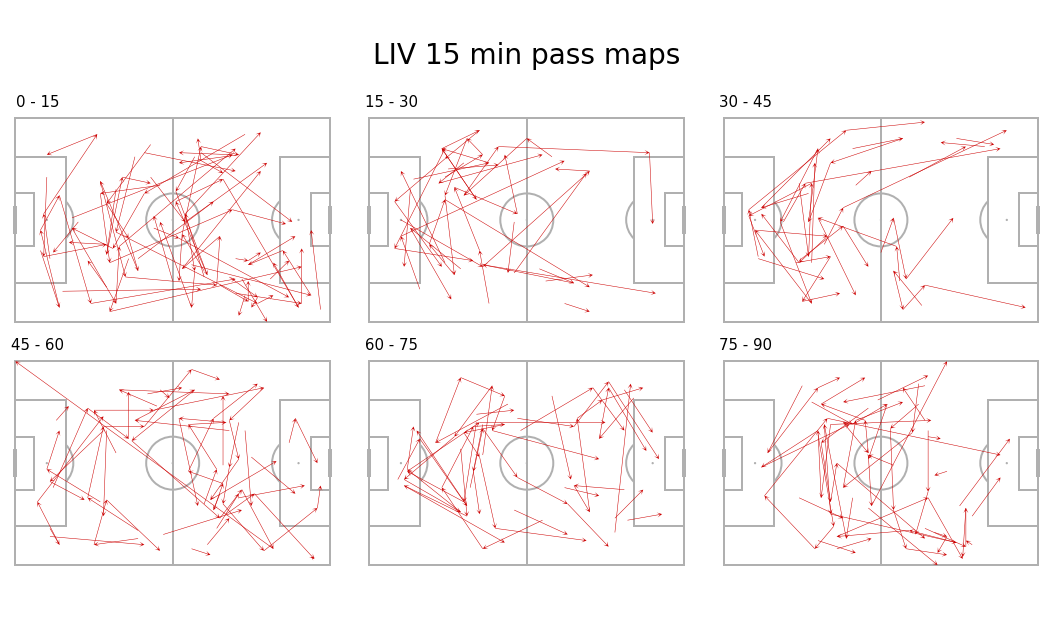

In [ ]:
pitch = Pitch(pitch_type='wyscout')

fig, axs = pitch.grid(ncols=3, nrows=2)

for i, ax in enumerate(axs['pitch'].flat):

    tempPasses = LivPasses[(LivPasses['minute']>i*15) & (LivPasses['minute']<i*15+15)]

    pitch.arrows(tempPasses['Origin X'], tempPasses['Origin Y'],
    tempPasses['End X'], tempPasses['End Y'], ax=ax, color="#cc0000", width=.5,
             headwidth=10, headlength=10)

    ax.text(7, -8, f"{i*15} - {i*15+15}", fontsize=15,
                    ha='center', va='center')
                    
axs['title'].text(0.5,0.5,"LIV 15 min pass maps", fontsize=28, ha='center', va='center')

<AxesSubplot:xlabel='Origin X', ylabel='Origin Y'>

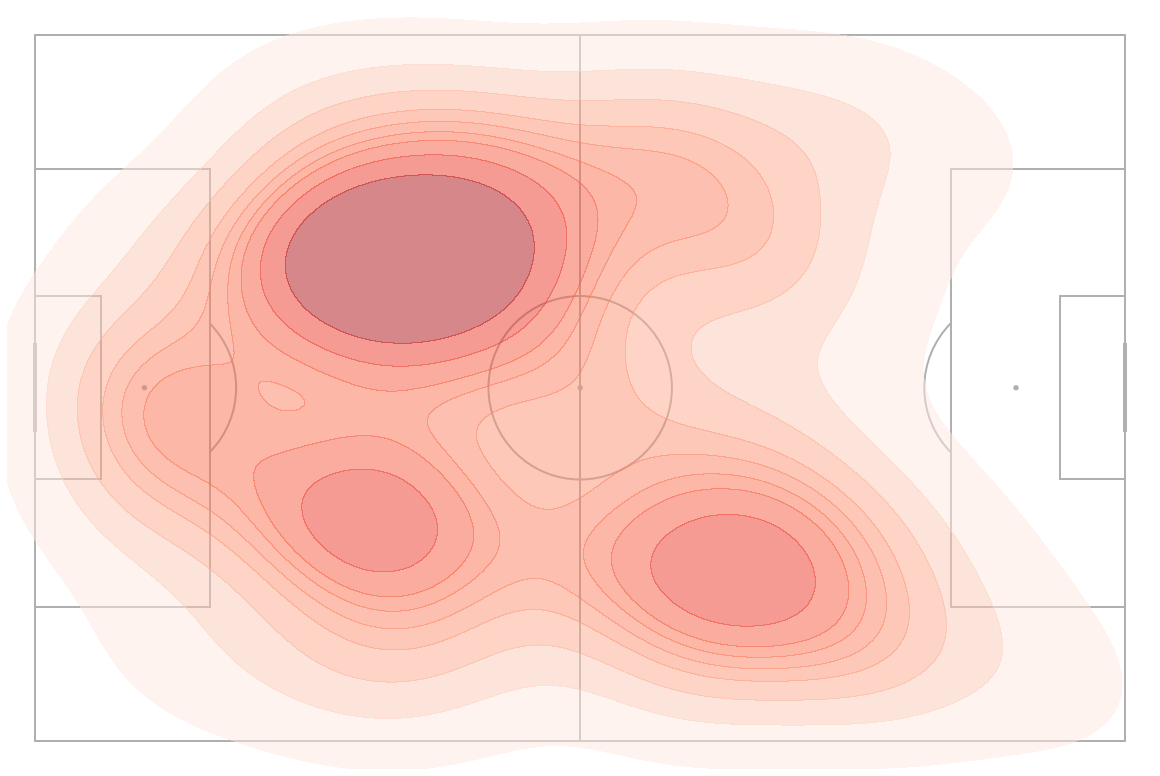

In [ ]:
# Use seaborn to plot a heatmap
pitch = Pitch(pitch_type='wyscout')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

sns.kdeplot(x=LivPasses['Origin X'], y=LivPasses['Origin Y'], ax=ax, fill=True, cmap='Reds', alpha=.5)

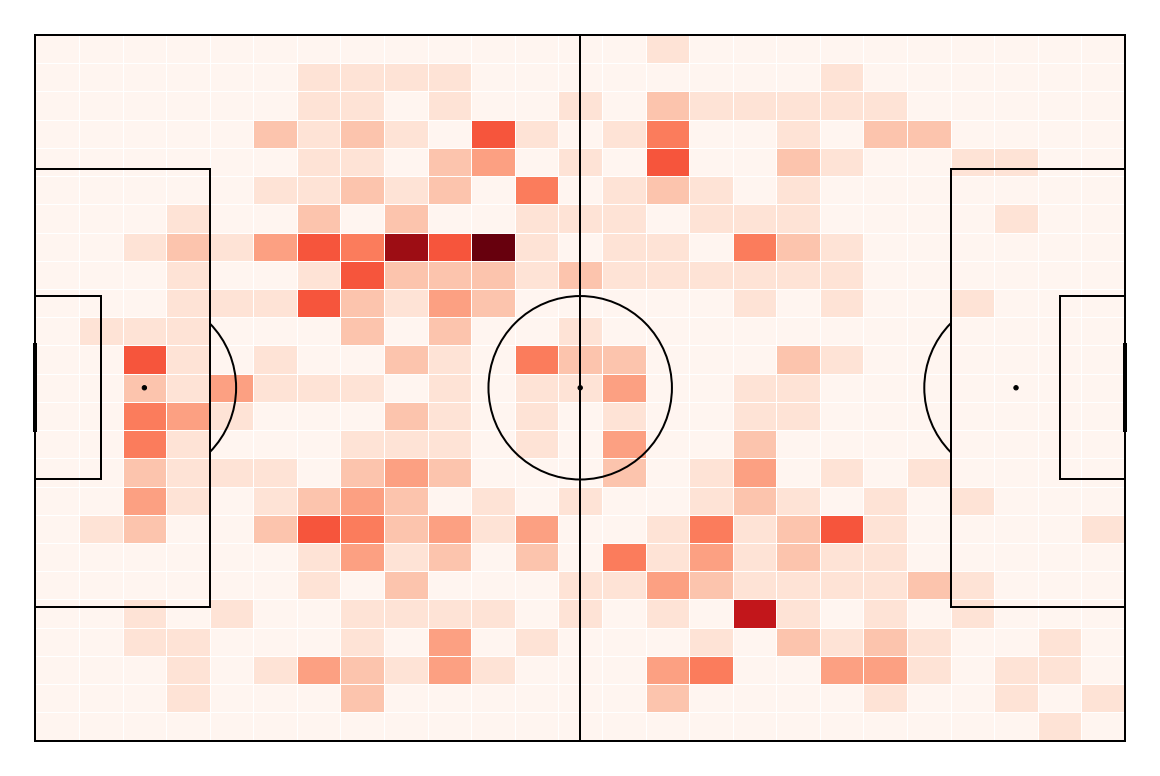

In [ ]:
# Plot a different heatmap type
pitch = Pitch(pitch_type='wyscout', line_zorder=2,
              pitch_color='#ffffff', line_color='#000000')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

stats = pitch.bin_statistic(LivPasses['Origin X'], LivPasses['Origin Y'], statistic='count', bins=(25,25))
pitch.heatmap(stats, edgecolors='#ffffff', cmap='Reds', ax=ax)


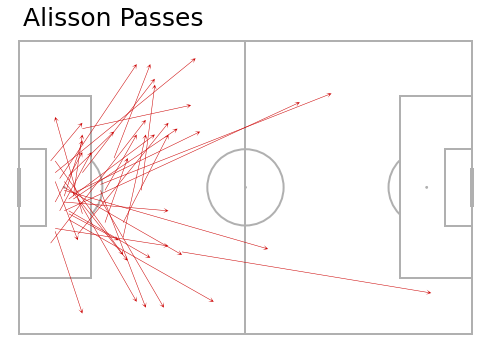

In [ ]:
#Create a function that creates a passmap for a player and save it or show it
def playerMap(player, color = '#444444', save=False):

    tempdf = passesDF[passesDF['Player'] == player]
    
    pitch = Pitch(pitch_type='wyscout')
    fig, ax = pitch.draw(figsize=(8, 5))
    fig.set_facecolor('#ffffff')

    pitch.arrows(tempdf['Origin X'], tempdf['Origin Y'],
    tempdf['End X'], tempdf['End Y'], ax=ax, color=color, width=.5,
             headwidth=10, headlength=10)

    ax.text(1, -5, f"{player} Passes", fontsize=25)

    if save == True:
        plt.savefig(f"{player} passes.png")
        plt.close(fig)
    else:    
        plt.show()

playerMap('Alisson', '#cc0000')

In [ ]:
# Save a lot of time and save each player's image
for player in df['Player'].unique():
    playerMap(player, save=True)